<a href="https://colab.research.google.com/github/Sarda20/DiabeticRetinopathy/blob/main/Diabetic_Retinopathy_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 3.0 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=8c3585b5c0bd613b23253e115a57f7da400af1c8f342ea9dbb024694dcbe1869
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle --version

Kaggle API 1.5.12


In [ ]:
%mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
%cd /content/drive/MyDrive/Diabetic-Retinopathy-Dataset/

/content/drive/MyDrive/Diabetic-Retinopathy-Dataset


In [ ]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-08-18 09:07:22          10839        892  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6628        492  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2507        186  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

In [ ]:
!kaggle datasets download -d tanlikesmath/diabetic-retinopathy-resized

100% 7.24G/7.25G [02:46<00:00, 47.3MB/s]
100% 7.25G/7.25G [02:46<00:00, 46.7MB/s]


In [ ]:
#move the zips to the trainfolder
#unzip the folder
#

#7z e testzip.zip -od:\ext
!7z x /content/drive/MyDrive/kaggle-dataset/train/train/


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/kaggle-dataset/train/                                                      1 folder, 5 files, 34997128208 bytes (33 GiB)
  0%    
Extracting archive: /content/drive/MyDrive/kaggle-dataset/train/train/train.zip.001.zip
--
Path = /content/drive/MyDrive/kaggle-dataset/train/train/train.zip.001.zip
Type = zip
Physical Size = 8391159087
64-bit = +

  0%      0% - train.zip.001                      1% - train.zip.001                      2% - train.zip.001                      3% - train.zip.0

In [ ]:
!7z e test.zip.001 -otest_images001


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         
ERROR: No more files
test.zip.001



System ERROR:
Unknown error -2147024872


In [ ]:
!7z e train.zip.001 -otrain_images001


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs AMD EPYC 7B12 (830F10),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 8388608000 bytes (8000 MiB)

Extracting archive: train.zip.001
  0% 1 Open            11% 4096 Open               34% 12288 Open               --
Path = train.zip.001
Type = Split
Physical Size = 8388608000
Volumes = 5
Total Physical Size = 34988445506
----
Path = train.zip
Size = 34988445506
--
Path = train.zip
Type = zip
Physical Size = 34988445506
64-bit = +

  0%      0% 6        0% 9 - train/10010_left.jpeg                                0% 16 - train/10015_right.jpeg                                  0% 22 

In [ ]:
#extracting the file from the zip
from zipfile import ZipFile

zipped = ZipFile("diabetic-retinopathy-resized.zip", "r")
zipped.extractall("data")
zipped.close()

# Main execution starts HERE!

In [ ]:
import os
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/Diabetic-Retinopathy-Dataset/data"

In [ ]:
resized_df = pd.read_csv(data_path + "/trainLabels.csv")

In [ ]:
labels = resized_df.sort_values('level')
classname = list(resized_df.level.unique())

In [ ]:
resizedData = data_path + "/resized_train/resized_train"

In [ ]:
os.path.exists(resizedData)

True

In [ ]:
print(classname)

[0, 1, 2, 4, 3]


In [ ]:
import os
import shutil

for i in classname:
    os.makedirs(os.path.join(resizedData, str(i)))

In [ ]:
os.path.exists(resizedData+"/0")

True

In [ ]:
#move the data
from tqdm import tqdm
for c in classname: # Category Name
    for i in tqdm(list(resized_df[resized_df['level']==c]['image'])): # Image Id
        fullname = i + ".jpeg"
        get_image = os.path.join(resizedData+"/", fullname) # Path to Images
        move_image_to_cat = shutil.move(get_image, resizedData+"/"+str(c))

100%|██████████| 873/873 [00:06<00:00, 136.67it/s]


In [ ]:
resized_df.head(11)

image  level
0    10_left      0
1   10_right      0
2    13_left      0
3   13_right      0
4    15_left      1
5   15_right      2
6    16_left      4
7   16_right      4
8    17_left      0
9   17_right      1
10   19_left      0

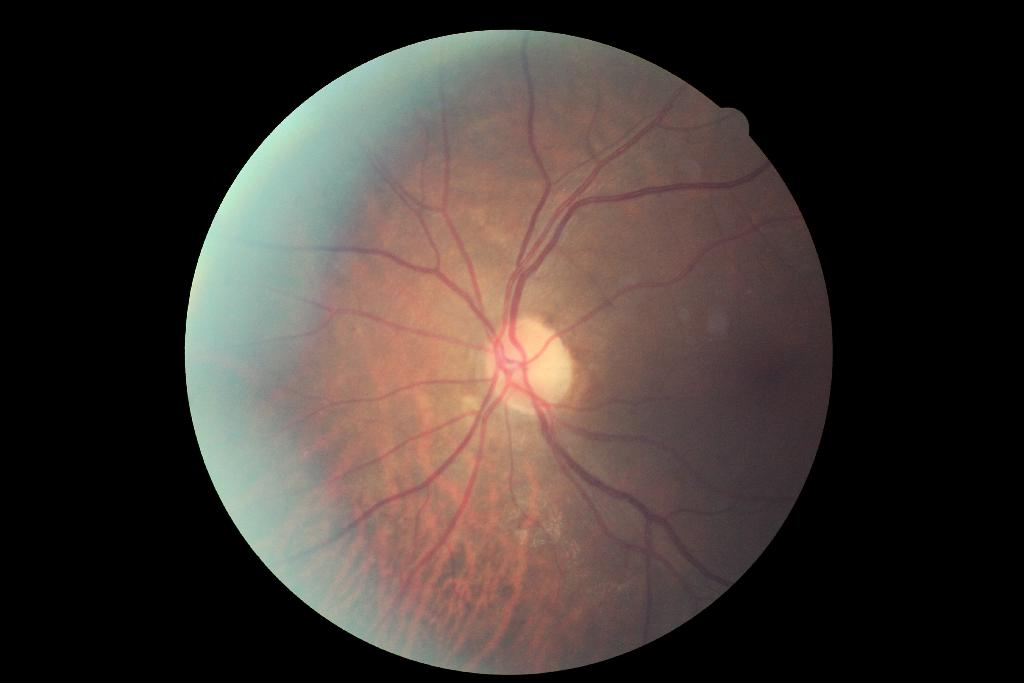

In [ ]:
from IPython.display import Image
Image(resizedData+"/0/"+resized_df.iloc[0].image+".jpeg", width=500)

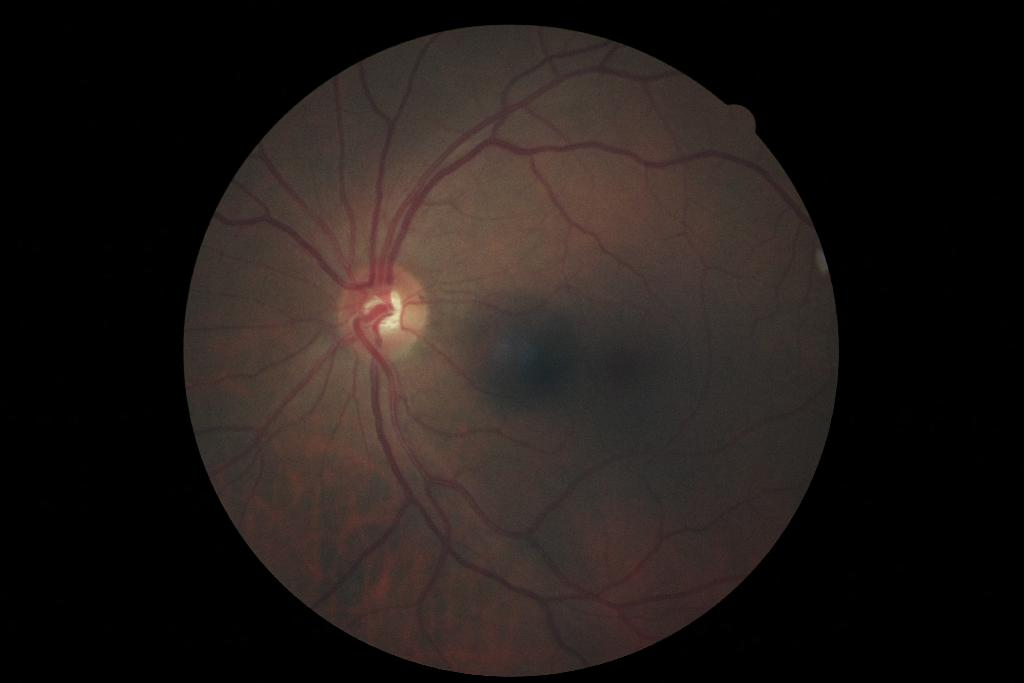

In [ ]:
Image(resizedData+"/0/"+resized_df.iloc[10].image+".jpeg", width=500)

In [ ]:
print(f"Total samples of dataset {len(resized_df)}")

Total samples of dataset 35126


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbeec7ae150>]],
      dtype=object)

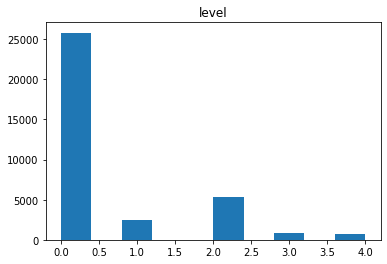

In [ ]:
resized_df.hist(grid=False)

In [ ]:
import cv2

image=cv2.imread(resized_data_path+resized_df.iloc[10].image+".jpeg")
image = cv2.resize(image, (512, 512))

In [ ]:
torch.tensor(image).shape

torch.Size([512, 512, 3])

# Previous Work

In [ ]:
resized_df.shape[0]%10

6

In [ ]:
(resized_df.shape[0]-6)/16

2195.0

In [ ]:
# train_set, val_set = torch.utils.data.random_split(dataset, [50000, 10000])
from keras.preprocessing import image
from tqdm import tqdm

# reading the training images

dataset_image = [ ]


for i in tqdm(range(resized_df.shape[0])):
  img = image.load_img(resized_data_path+resized_df.iloc[i].image +".jpeg", target_size=(512,512,3), grayscale=False)

  img = image.img_to_array(img)

  img = img/255

  dataset_image.append(img)
X = np.array(dataset_image)

 71%|███████▏  | 1565/2195 [00:33<00:15, 41.96it/s]

In [ ]:
X = np.array(dataset_image)

In [ ]:
import hickle as hkl

data = {'name': 'test', 'data_arr': [1, 2, 3, 4]}

# Dump data to file
hkl.dump(data, 'new_data_file.hkl')

# Load data from file
data2 = hkl.load('new_data_file.hkl')

In [ ]:
train_set, val_set = torch.utils.data.random_split(dataset_image, [30126, 500])

In [ ]:
# extracting the labels and converting the images to tensors

train_dataset = []
start = time.process_time()

data_path = "/content/drive/MyDrive/kaggle-dataset/train_images001"
train_df = pd.read_csv("/content/drive/MyDrive/kaggle-dataset/trainLabels.csv.zip")



def gen_labels_&_features(dataframe, path, files=35126):

  for row in range(0,files):
    image_name = dataframe.iloc[row].image
    level = dataframe.iloc[row].level

    img = cv2.imread(data_path + "/"+image_name+".jpeg")
    if image is None:
      raise Exception("The image file could not be read")

    print(data_path + "/"+image_name+".jpeg")
    img = cv2.resize(img, (64, 64))
    img_tensor = torch.tensor(img, dtype=torch.float64)

    train_dataset.append([img_tensor, level])

  end = time.process_time()

  print(f"The total time taken {((end- start) *1000)/60} mins")




SyntaxError: ignored

In [ ]:
# normalizing all the pixel values
dataset = [[(image/255).permute(2,1,0).float(), label] for image, label in train_dataset]

NameError: ignored

In [ ]:
# Now to split the dataset into training and validation set

def split(dataset, val_per=0.1, seed=42):
  # set a random seed for reproducibility
  np.random.seed(seed)
  # total size of the dataset
  n = len(dataset)
  # total data for validation purpose
  val_data = int(val_per * n)
  # generating a random permutation
  rand_indices = np.random.permutation(n)

  # returning the train and val indices
  return rand_indices[val_data:], rand_indices[:val_data]

In [ ]:
train_indices, val_indices =  split(dataset, val_per=0.1)

In [ ]:
from torch.utils.data import TensorDataset
from torch.utils.data.dataloader import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

batch_size = 100

train_sampler = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_dl = DataLoader(dataset, batch_size=batch_size, sampler=val_sampler)


In [ ]:
print(f"Number of data is Training set: {len(train_dl)*batch_size}\nNumber of data in Validation set: {len(val_dl)*batch_size}")

Number of data is Training set: 4500
Number of data in Validation set: 500


In [ ]:
for x, y in train_dl:
  print(x.shape)
  print(y)
  break

torch.Size([100, 3, 64, 64])
tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 1,
        0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 1, 0, 3,
        0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
        2, 0, 0, 0, 0, 4, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2,
        2, 0, 0, 0])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dimenion of the image: torch.Size([64, 64, 3])
Label of the image: 3


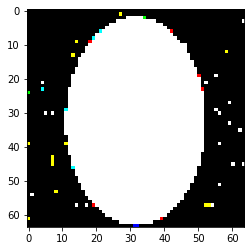

In [ ]:
# plotting an image from the dataset

# TODO:

image, label = train_dataset[300]
print(f"Dimenion of the image: {image.shape}")
print(f"Label of the image: {label}")

# change the dimension to [32, 32,0] before plotting
plt.imshow(image)

In [ ]:
# to see a batch of examples

#TODO:

from torchvision.utils import make_grid

def show_examples(dl):
  for images, labels in dl:
    print(images.shape)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, 10))
    break

In [ ]:
import torch.nn as nn
?nn.Conv2d()

In [ ]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 20, stride=1, kernel_size=3, padding=1),  # out = 100 x 20 x 64 x 64
    nn.MaxPool2d(2,2) # out = 100 x 20 x 32 x 32
    )

In [ ]:
for images, labels in train_dl:
  print(images.shape)
  out = simple_model(images)
  print(out.shape)
  break

torch.Size([100, 3, 64, 64])
torch.Size([100, 20, 32, 32])


Done with Data Preprocessing

## Model

In [ ]:
import torch.nn as nn

#change
cnn_model = nn.Sequential(
    # 3 x 64 x 64
    nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    #  16 x 32 x 32
    nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    # 32 x 16 x 16
    nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    # 64 x 8 x 8
    nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    # 128 x 4 x 4
    nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    # 256 x 2 x 2
    nn.Flatten(),
    nn.Linear(1024, 5)
)

## Training the model

In [ ]:
def loss_batch(model, loss_func, xb, yb, metric= None, optim= None):
  # Generating predictions
  preds = model(xb)
  # Calculating the loss
  loss = loss_func(preds, yb)

  # backprop
  if optim is not None:
    # Compute gradients
    loss.backward()
    # Update parameters
    optim.step()
    # Reset gradients
    optim.zero_grad()

  metric_val = None
  if metric is not None:
    # Compute metric
    metric_val = metric(preds, yb)

  # returning loss_value, batch_size, metric_value
  return loss.item(), len(xb), metric_val

In [ ]:
def evaluate(model, loss_func, val_dl, metric = None):
  with torch.no_grad():
    results = [loss_batch(model, loss_func, xdl, ydl, metric) for xdl, ydl in val_dl]

    # array of loss, batch_size, metric_result
    loss, batch_size, metric_result = zip(*results)
    total_size = np.sum(batch_size)

    # calculating the average loss
    avg_loss = np.sum(np.multiply(loss, batch_size))/total_size

    # calculating the metric value
    avg_metric_value= None
    if metric is not None:
      avg_metric_value = np.sum(np.multiply(metric_result, batch_size))/total_size

    return avg_loss, total_size, avg_metric_value

In [ ]:
def fit(model, epochs, loss_func, train_dl, val_dl, optim = None, metric= None):
  history={"loss":[], "acc":[]}

  # instantiate the optimizer
  if optim is None: optim = torch.optim.SGD(model.parameters(), lr=1e-3)

  for epoch in range(epochs):
    # training the model batch by batch
    model.train()
    for xb, yb in train_dl:
      loss, _, _ = loss_batch(model, loss_func, xb, yb, optim = optim)

    # evaluating each step
    model.eval()
    avg_loss_epoch,_, avg_metric_epoch = evaluate(model, loss_func, val_dl, metric)


    # saving the results of each epoch in history
    history["loss"].append(avg_loss_epoch)
    history["acc"].append(avg_metric_epoch)

    # printing the result
    if metric is not None:
      print("Epoch [{}/{}] ===> Loss: {:.4f}, {}: {:.4f}".format(epoch+1, epochs, avg_loss_epoch, metric.__name__, avg_metric_epoch))

    else:
      print("Epoch [{}/{}] ===> Loss: {:.4f}".format(epoch, epochs, avg_loss_epoch) )

  return history

In [ ]:
# creating a metric
def accuracy(preds, true_lb):
  _, preds = torch.max(preds, dim=1)
  return torch.sum(preds == true_lb).item()/len(preds)

In [ ]:
# training the model
import torch.nn.functional as F

epochs = 10
loss_func = F.cross_entropy

#change
optim = torch.optim.Adam(cnn_model.parameters(), lr=0.00001)
#change
history = fit(cnn_model, epochs, loss_func, train_dl, val_dl, optim=optim, metric= accuracy)

Epoch [1/10] ===> Loss: 1.5573, accuracy: 0.7420
Epoch [2/10] ===> Loss: 1.4422, accuracy: 0.7420
Epoch [3/10] ===> Loss: 1.1745, accuracy: 0.7420
Epoch [4/10] ===> Loss: 0.9013, accuracy: 0.7420
Epoch [5/10] ===> Loss: 0.8674, accuracy: 0.7420
Epoch [6/10] ===> Loss: 0.8582, accuracy: 0.7420
Epoch [7/10] ===> Loss: 0.8547, accuracy: 0.7420
Epoch [8/10] ===> Loss: 0.8529, accuracy: 0.7420
Epoch [9/10] ===> Loss: 0.8522, accuracy: 0.7420
Epoch [10/10] ===> Loss: 0.8503, accuracy: 0.7420


Text(0.5, 1.0, 'Loss per epoch')

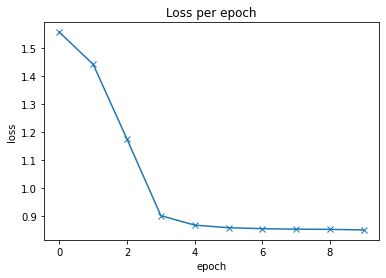

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history["loss"], "-x")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss per epoch")

In [ ]:
!pip install visualkeras

     |████████████████████████████████| 798kB 36.6MB/s 


In [ ]:
 # text_list = ['Convolution', 'Max-pooling', 'Convolution', 'Max-pooling', 'Convolution', 'Max-pooling', 'Convolution', 'Max-pooling', 'Convolution', 'Max-pooling']
  """
    size_list = [(32, 32), (16, 16), (8, 8), (4, 4), (2, 2)]
    num_list = [3, 16, 32, 64, 128, 256]
    """
    #text_list = ['Flatten\n', 'Fully\nconnected']
